In [ ]:
import pandas as pd
# Load your dataset
df = pd.read_csv('/content/accident_prediction_india.csv')
# Basic info
print("Shape:", df.shape)
df.head()


Shape: (3000, 22)


,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


In [ ]:
# Check structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

In [ ]:
# Summary of missing values
print("\nMissing values:\n")
print(df.isnull().sum())



Missing values:

State Name                       0
City Name                        0
Year                             0
Month                            0
Day of Week                      0
Time of Day                      0
Accident Severity                0
Number of Vehicles Involved      0
Vehicle Type Involved            0
Number of Casualties             0
Number of Fatalities             0
Weather Conditions               0
Road Type                        0
Road Condition                   0
Lighting Conditions              0
Traffic Control Presence       716
Speed Limit (km/h)               0
Driver Age                       0
Driver Gender                    0
Driver License Status          975
Alcohol Involvement              0
Accident Location Details        0
dtype: int64


In [ ]:
# View unique values for categorical columns
categorical_cols = ['Time of Day', 'Road Condition', 'Weather Conditions', 'Lighting Conditions']
for col in categorical_cols:
    print(f"\nUnique values in '{col}':\n{df[col].unique()}")


Unique values in 'Time of Day':
['1:46' '21:30' '5:37' ... '21:36' '10:16' '19:36']

Unique values in 'Road Condition':
['Wet' 'Dry' 'Under Construction' 'Damaged']

Unique values in 'Weather Conditions':
['Hazy' 'Foggy' 'Rainy' 'Stormy' 'Clear']

Unique values in 'Lighting Conditions':
['Dark' 'Dusk' 'Dawn' 'Daylight']


In [ ]:
# Convert to datetime and extract hour
df['Hour'] = pd.to_datetime(df['Time of Day'], format='%H:%M', errors='coerce').dt.hour

# Check if it worked
df[['Time of Day', 'Hour']].head()


,Time of Day,Hour
0,1:46,1
1,21:30,21
2,5:37,5
3,0:31,0
4,11:21,11


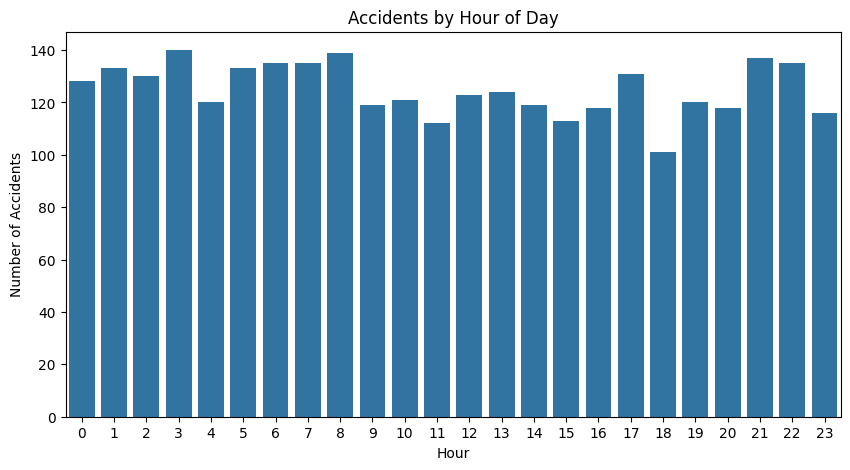

In [ ]:
# Visualize Accidents by Time of Day
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


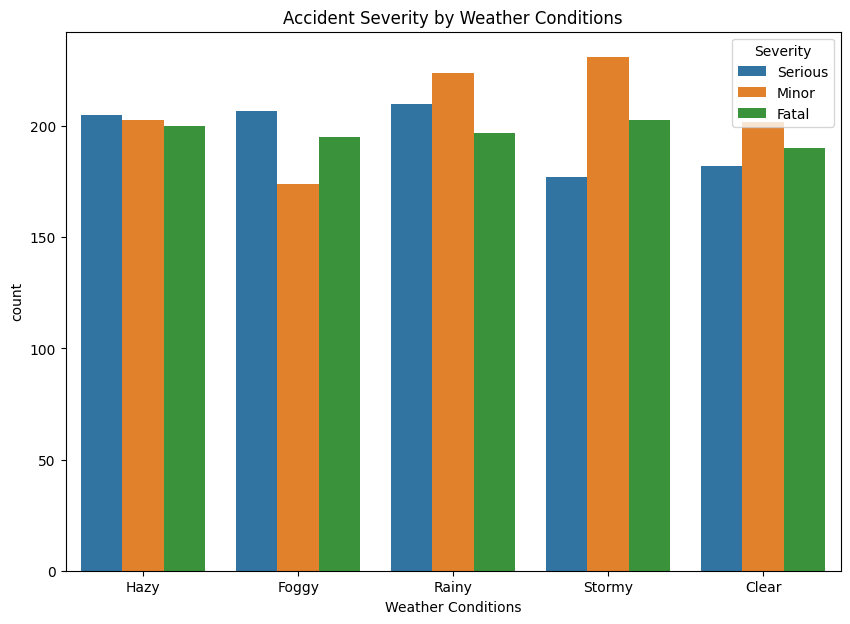

In [ ]:
# Visualize Accidents by Weather Condition
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Weather Conditions', hue='Accident Severity')
plt.title('Accident Severity by Weather Conditions')
plt.legend(title='Severity')
plt.show()

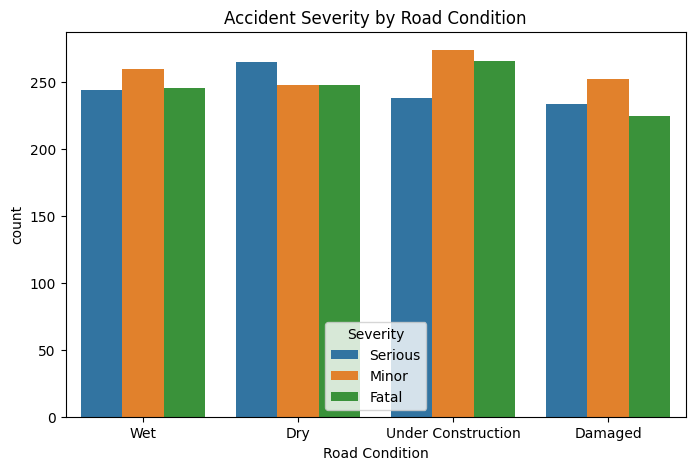

In [ ]:
# Visualize Accidents by Road Condition
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Road Condition', hue='Accident Severity')
plt.title('Accident Severity by Road Condition')
plt.legend(title='Severity')
plt.show()

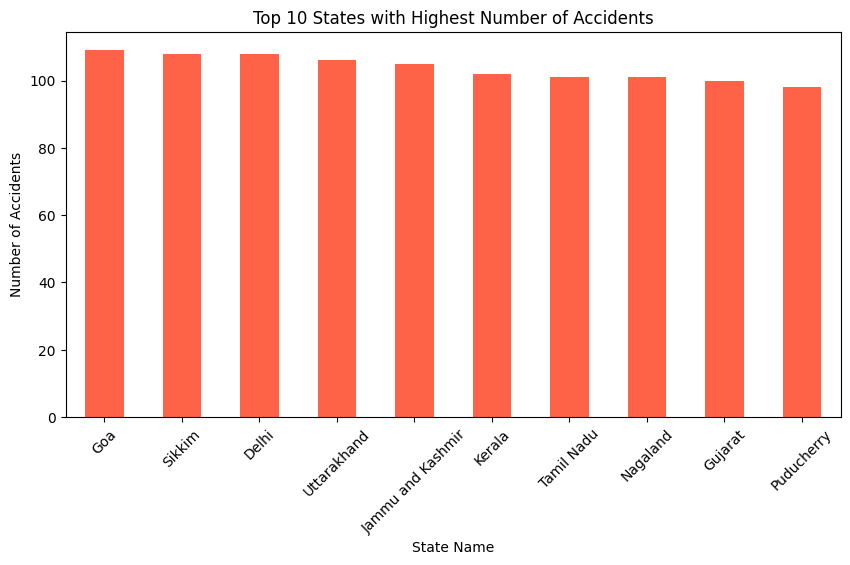

In [ ]:
# Visualize State-wise Hotspots
plt.figure(figsize=(10,5))
df['State Name'].value_counts().nlargest(10).plot(kind='bar', color='tomato')
plt.title('Top 10 States with Highest Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


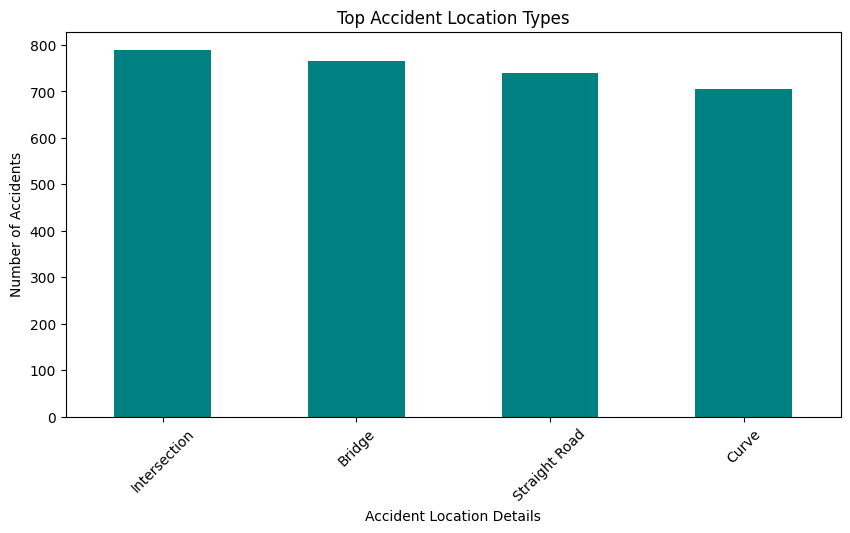

In [ ]:
# Visualize Location Type Hotspots
plt.figure(figsize=(10,5))
df['Accident Location Details'].value_counts().nlargest(10).plot(kind='bar', color='teal')
plt.title('Top Accident Location Types')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()
